In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
hdfc = yf.download('hdfc.ns',start='2020-01-01',end = '2021-03-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
reliance = yf.download('reliance.ns',start='2020-01-01',end = '2021-03-31')

[*********************100%***********************]  1 of 1 completed


In [5]:
hdfc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,2418.00,2438.500000,2409.000000,2433.949951,2380.820557,945874
2020-01-02,2430.00,2472.750000,2422.000000,2466.399902,2412.562256,1701396
2020-01-03,2455.00,2466.399902,2441.800049,2454.449951,2400.873047,1963923
2020-01-06,2428.00,2445.000000,2371.399902,2384.100098,2332.059082,2656731
2020-01-07,2401.25,2428.800049,2380.199951,2415.050049,2362.333252,3771992


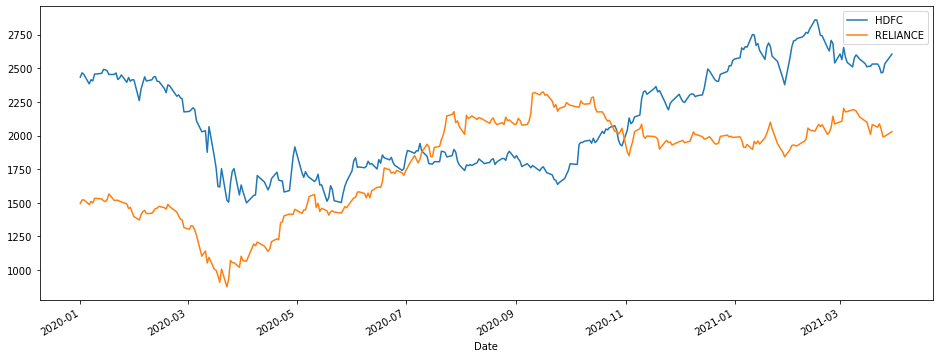

In [8]:
hdfc['Close'].plot(label='HDFC',figsize=(16,6))
reliance['Close'].plot(label='RELIANCE')
plt.legend();

In [10]:
np.corrcoef(hdfc['Close'],reliance['Close'])

array([[1.        , 0.25709307],
       [0.25709307, 1.        ]])

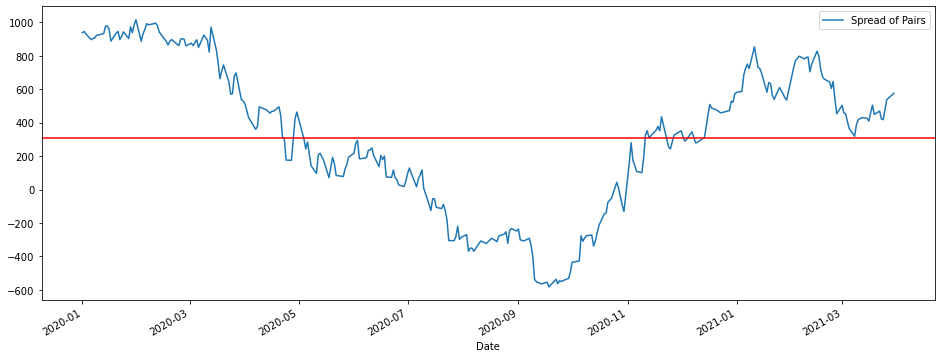

In [12]:
spread = hdfc['Close'] - reliance['Close']
spread.plot(label='Spread of Pairs',figsize=(16,6))
plt.axhline(spread.mean(), c = 'r')
plt.legend();

In [13]:
def zscore(stocks):
    return (stocks - stocks.mean())/np.std(stocks)

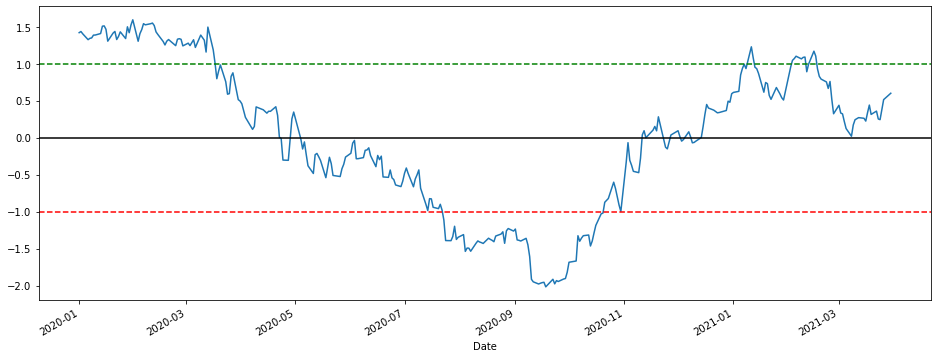

In [17]:
zscore(spread).plot(figsize=(16,6))
plt.axhline(zscore(spread).mean(),c='black')
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--')

In [21]:
spread_MA1 = spread.rolling(1).mean()
spread_MA30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()
zscore_30_1  =  (spread_MA1 - spread_MA30) / std_30

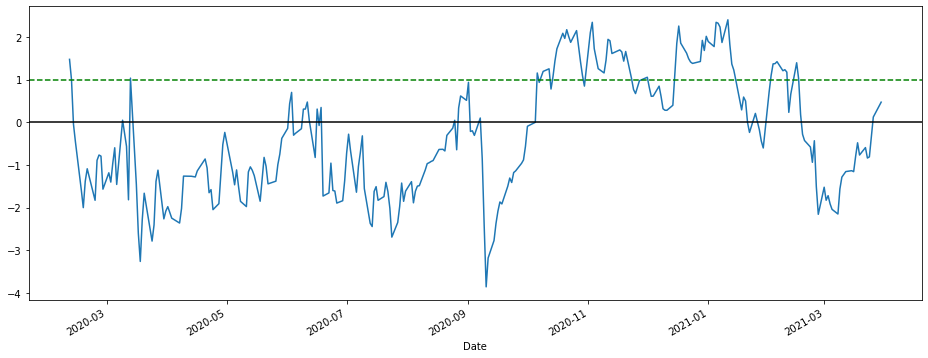

In [22]:
zscore_30_1.plot(label='Rolling 30 day',figsize=(16,6))
plt.axhline(0,c='black')
plt.axhline(1.0, c= 'g',ls='--')
